# Employee Turnover Project Competition

First I will import modules, read in data, and then print the first few rows of data:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./data/employee_churn_data.csv')
print(df.head())



   department  promoted    review  projects  salary  tenure  satisfaction  \
0  operations         0  0.577569         3     low     5.0      0.626759   
1  operations         0  0.751900         3  medium     6.0      0.443679   
2     support         0  0.722548         3  medium     6.0      0.446823   
3   logistics         0  0.675158         4    high     8.0      0.440139   
4       sales         0  0.676203         3    high     5.0      0.577607   

   bonus  avg_hrs_month left  
0      0     180.866070   no  
1      0     182.708149   no  
2      0     184.416084   no  
3      0     188.707545   no  
4      1     179.821083   no  


As can be seen above, each row represents an employee, the 'left' column indicates whether or not the employee separated or left the company, and the other rows show the department of the employee, performace appraisal, employee satisfaction, salary range, whether the employee was recently promoted, average hours worked per month, number of projects employee is working on, years of service, and whether the employee received a bonus.  

In this project, we will see how employee turnover is correlated with each of these employee attributes 

# Part I:  Which Department had the most and least turnover?

First I will plot a barchart of turnover rate for each department

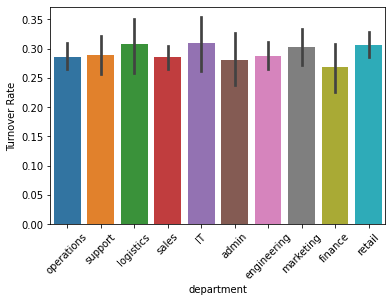

In [ ]:
df['left'].replace(['no', 'yes'], [0, 1], inplace=True)
sns.barplot(x = 'department', y = 'left', data = df)
plt.xticks(rotation = 45)
plt.ylabel("Turnover Rate")
plt.show()

As can be seen from the above, it is a very tight race with very little variance between Departments. We will have to break the tie by actually calculating the turnover rate for each department and looking at the results.   I will therefore print out the turnover rate for each department using a 'groupby' and value counting the 'left' column

## Calculation of Turnover for each Department:

In [ ]:
df['left'].replace([0, 1], ['no', 'yes'], inplace=True)
xf = df.groupby(['department'])['left'].value_counts(normalize = True)
yf = xf.drop(index = 'no', level = 1)
zf = yf.droplevel(1, axis = 0)
print(zf)

department
IT             0.308989
admin          0.281324
engineering    0.288259
finance        0.268657
logistics      0.308333
marketing      0.302993
operations     0.286465
retail         0.305646
sales          0.285183
support        0.288435
Name: left, dtype: float64


As can be seen above and in answer to Question 1, the department with the highest employee turnover is IT with 30.90% separations and the department with the lowest employee turnover is finance with 26.87% separations.

# Part II:  Investigate which variables seem to be better predictors of employee departure

I will now investigate the relationship between each remaining variable versus turnover. For each variable, I will first calculate mean, and then plot the data and discuss results

## 1.  Employee Performance Reviews

I will now investigate the relation between employee performance ratings and employee turnover

left
no     0.635164
yes    0.692262
Name: review, dtype: float64


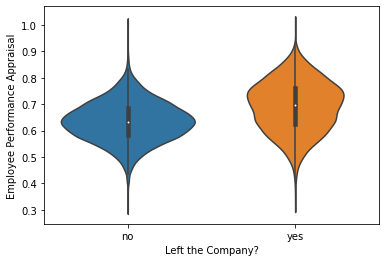

In [ ]:
af = df.groupby(['left'])['review'].mean()
print(af)
sns.violinplot(x = 'left', y = 'review', data = df)
plt.xlabel("Left the Company?")
plt.ylabel("Employee Performance Appraisal")
plt.show()

Both the calculated numbers and the violin plot seem to show that employees that receive a high performance rating are more apt to leave the company than those in the middle of the curve.

## 2. Recent Promotions

Lets now see whether an employee was recently promoted has an influence on whether the employee stays or leaves the company

left
no     0.034340
yes    0.020474
Name: promoted, dtype: float64


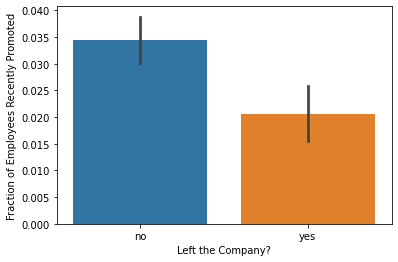

In [ ]:
bf = df.groupby(['left'])['promoted'].mean()
print(bf)
sns.barplot(x = 'left', y = 'promoted', data = df)
plt.xlabel("Left the Company?")
plt.ylabel("Fraction of Employees Recently Promoted")
plt.show()

It appears that Promotions are a very big predictor of whether an employee will leave the company.  If an employee has not been recently promoted, that employee is much more apt to leave the company than one who has been promoted.

## 3. Number of Projects employee is involved in

Lets look at the relationship between number of projects an employee is working on versus whether they leave the company

left
no     3.279455
yes    3.263649
Name: projects, dtype: float64


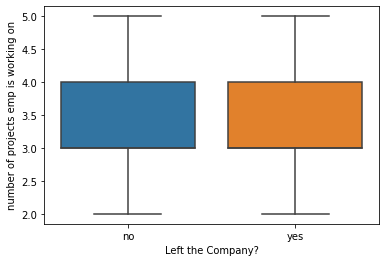

In [ ]:
cf = df.groupby(['left'])['projects'].mean()
print(cf)
sns.boxplot(x = 'left', y = 'projects', data = df)
plt.xlabel("Left the Company?")
plt.ylabel("number of projects emp is working on")
plt.show()

Both the calculated values and the bar chart seem to say that the turnover rate of employees does not vary much with regard to the number of projects an employee is involved in.  

## 4. Tenure -- Years of Service

Lets now calculate the average seniority for separated vs retained emplouees:

In [ ]:
ff = df.groupby(['left'])['tenure'].mean()
print(ff)

left
no     6.546625
yes    6.579382
Name: tenure, dtype: float64


It appears that the number of years the employee has been with the company is not a great predictor of whether an employee is likely to leave the company.  

Now lets look at a box plot:

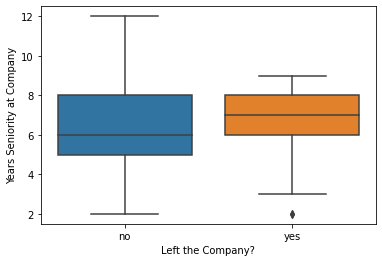

In [ ]:
sns.boxplot(x = 'left', y = 'tenure', data = df)
plt.xlabel("Left the Company?")
plt.ylabel("Years Seniority at Company")
plt.show()

The boxplot tells a slightly different picture.  It appears that employees in the 7-8 year of seniority are most likely to separate, those around 6 years are least likely to separate, and those with 10 years or  so are also less likely to separate.  So it appears that turnover does vary with seniority to at least a mild extent.

## 5. Employee Satisfaction

Lets now calculate employee satisfaction ratings for separated and retained employees

In [ ]:
ff = df.groupby(['left'])['satisfaction'].mean()
print(ff)

left
no     0.505634
yes    0.502244
Name: satisfaction, dtype: float64


It appears that the average employee satisfaction is the same for both retained and separated employees.  Lets now do a violin plot:

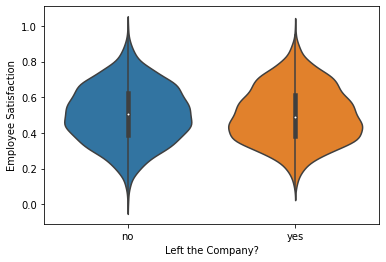

In [ ]:
sns.violinplot(x = 'left', y = 'satisfaction', data = df)
plt.xlabel("Left the Company?")
plt.ylabel("Employee Satisfaction")
plt.show()

The violin plot seems to show that the very satisfied and the least satisfied are most apt to want to leave the company, while the ones in the middle are most apt to stay.

## 6 Bonus
We will now look at how employee turnover varies according to whether an employee receives a bonus.  Data and barchart show fraction receiving a bonus.  Again, left = 'yes' indicates separation, left = 'no' indicates retention

left
no     0.215068
yes    0.204741
Name: bonus, dtype: float64


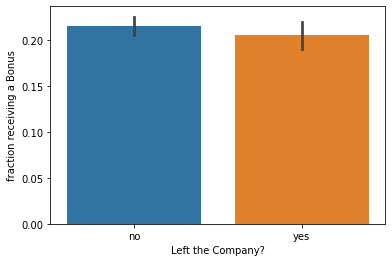

In [ ]:
gf = df.groupby(['left'])['bonus'].mean()
print(gf)
sns.barplot("left", "bonus", data = df)
plt.ylabel("fraction receiving a Bonus")
plt.xlabel("Left the Company?")
plt.show()

It appears from both the bar chart and the calculated numbers that whether or not an employee receives a bonus has little bearing on whether that employee is likely to leave.  

## 7. Average Hours per Month:
Lets now calculate mean average hours per month of retained employees (i.e. left = 'no') and separated employees (i.e.left = 'yes')

In [ ]:
hf = df.groupby(['left'])['avg_hrs_month'].mean()
print(hf)

left
no     184.637605
yes    184.719730
Name: avg_hrs_month, dtype: float64


It appears that the Average Hours per Month does not vary much between retained and separated employees.  Now lets now do a violin plot:

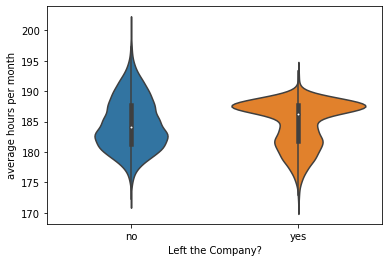

In [ ]:
sns.violinplot(x = 'left', y = 'avg_hrs_month', data = df)
plt.xlabel("Left the Company?")
plt.ylabel("average hours per month")

plt.show()

The violin plot show much more.  Employees that worked a lot of hours (i.e. 190) 
are much more likely to separate and employees working less hours (i.e. 180)
 are least likely to separate.  But because a few workers who work extreme hours 
(near 200) did not leave, these outliers result in equal means.

## 8. Salary
I will now calculate and produce employee turnover rate (i.e. 'left') according to salary (i.e. high, medium and low)

In [ ]:

hf = df.groupby(['salary'])['left'].value_counts(normalize = True)
print(hf)

salary  left
high    no      0.714470
        yes     0.285530
low     no      0.716872
        yes     0.283128
medium  no      0.704886
        yes     0.295114
Name: left, dtype: float64


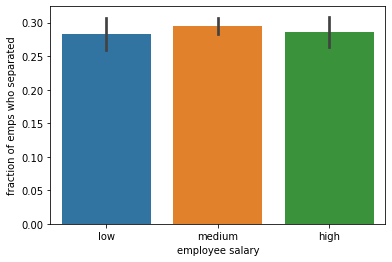

In [ ]:
df['left'].replace(['no', 'yes'], [0, 1], inplace=True)
sns.barplot(x = "salary", y = "left", data = df)
plt.ylabel("fraction of emps who separated")
plt.xlabel("employee salary")
plt.show()

It appears from the above that employee turnover rates does not vary much by salary. 

# Part III:  My Recommendations to reduce turnover

Since failing to get promoted seems to be the biggest predictor of employee turnover,
 and since many who leave are high achievers with high monthly hours worked 
and high reviews by superiors, my recommendation to prevent turnover
 would be to fix the promotion system so that so many high achievers dont get overlooked. 
 This could be achieved by promoting more high end achievers, eliminating 
promotions of lower end achievers, or provide some other benefits
 to high end achievers so that they do not want to leave the company.